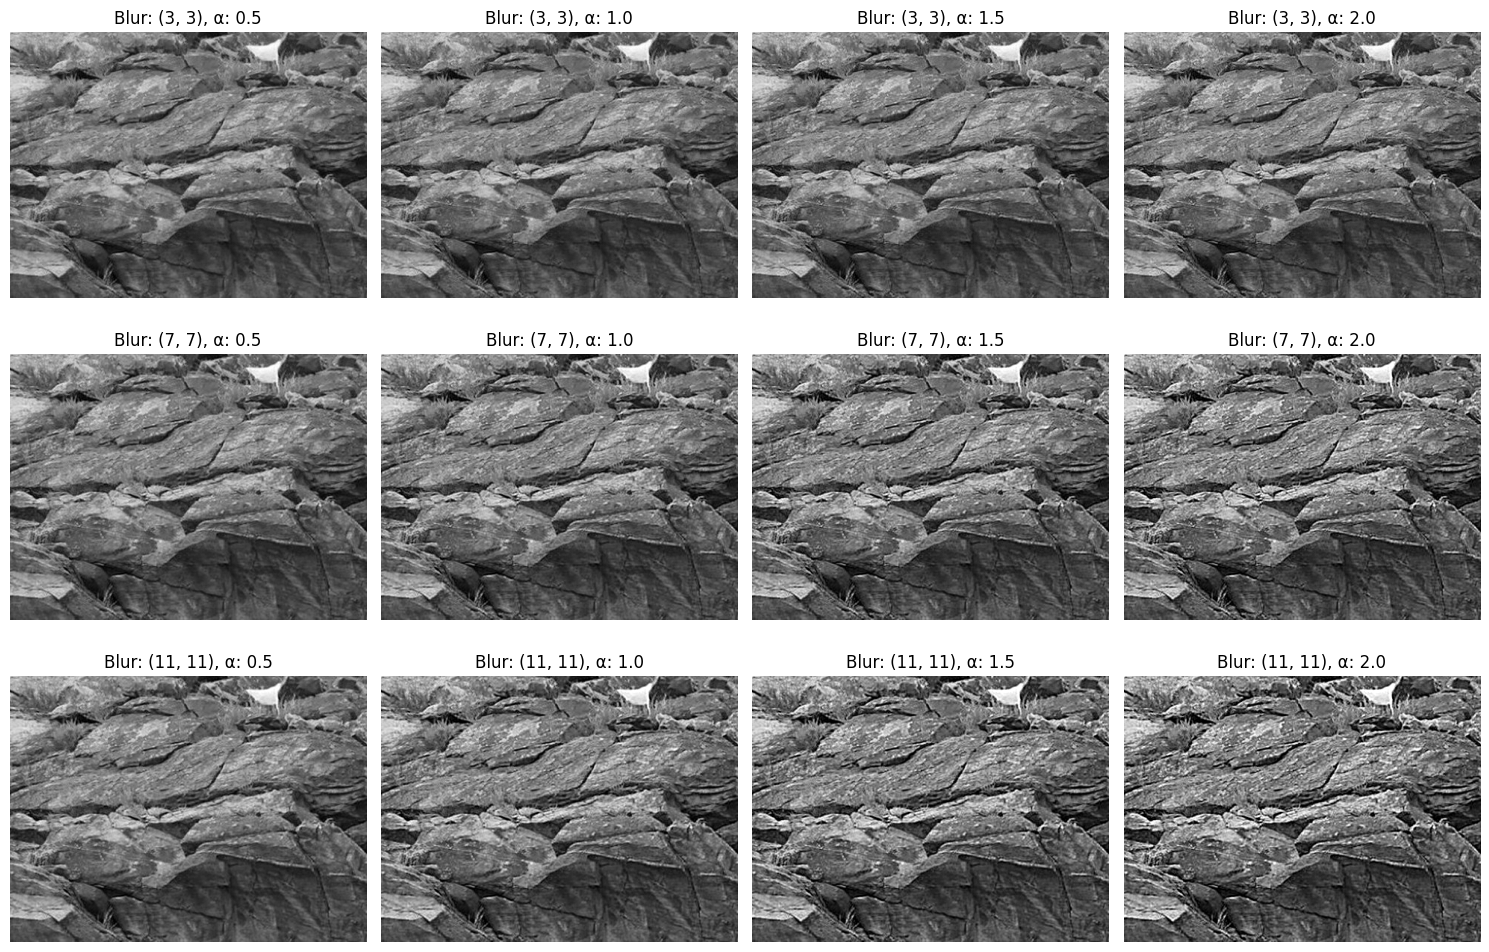

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기
img = cv2.imread('blurred.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image file 'blurred.jpg' not found.")

# 파라미터 설정
blur_sizes = [(3, 3), (7, 7), (11, 11)]  # 다양한 블러링 커널 크기
alpha_values = [0.5, 1.0, 1.5, 2.0]  # 다양한 샤프닝 강도

# 플롯 생성
plt.figure(figsize=(15, 10))
plot_idx = 1

for blur_size in blur_sizes:
    # 가우시안 블러 적용
    blurred_img = cv2.GaussianBlur(img, blur_size, 0)
    
    for alpha in alpha_values:
        # 샤프닝 계산 (NumPy 사용)
        img_sharpened = (1 + alpha) * img - alpha * blurred_img
        
        # 값 클리핑 및 데이터 타입 변환
        img_sharpened = np.clip(img_sharpened, 0, 255).astype(np.uint8)
        
        # 결과 출력
        plt.subplot(len(blur_sizes), len(alpha_values), plot_idx)
        plt.imshow(img_sharpened, cmap='gray')
        plt.title(f'Blur: {blur_size}, α: {alpha}')
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.show()